# Train/Test

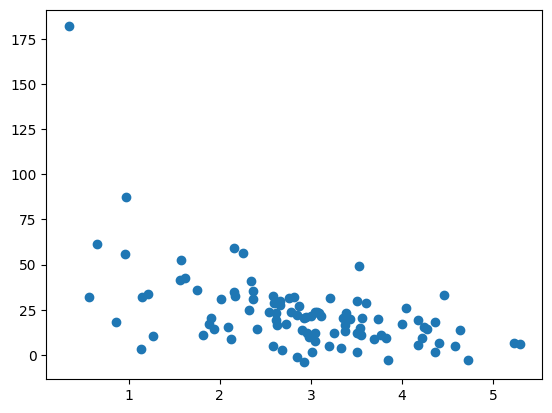

In [73]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2)

pageSpeeds = np.random.normal(3.0, 1.0, 100)
purchaseAmount = np.random.normal(50.0, 30.0, 100)/pageSpeeds

#plotando o gráfico
plt.scatter(pageSpeeds, purchaseAmount)

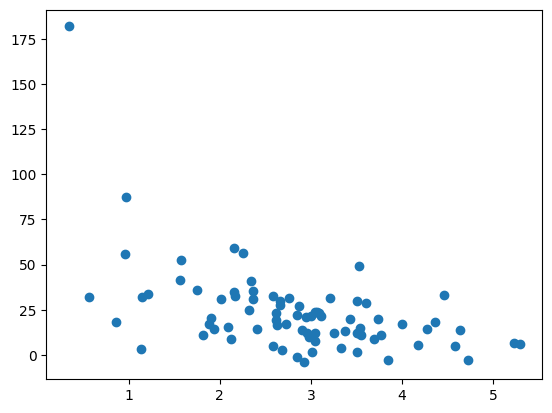

In [74]:
#separando em grupos de treino e teste

trainX = pageSpeeds[:80]
testX = pageSpeeds[80:]

trainY = purchaseAmount[:80]
testY = purchaseAmount[80:]

plt.scatter(trainX, trainY)

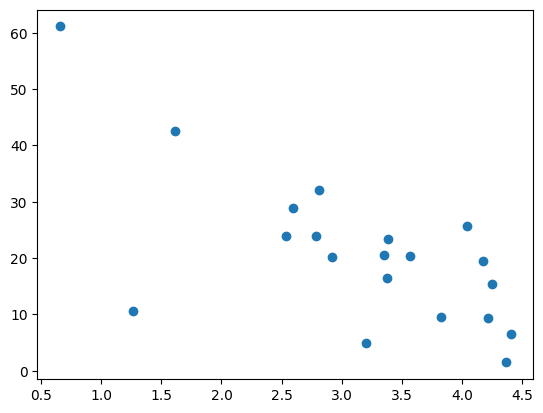

In [75]:
plt.scatter(testX, testY)

In [76]:
x = np.array(trainX)
y = np.array(trainY)

#criando o polinômio de regressão
p4 = np.poly1d(np.polyfit(x, y, 8))

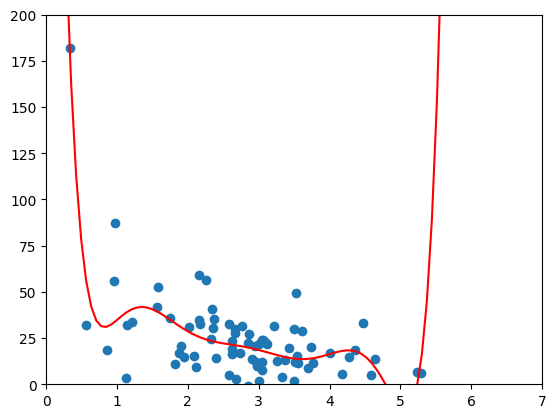

In [77]:
#plotando o polinômio no gráfico do grupo de treino

xp = np.linspace(0, 7, 100)
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0,200])
plt.scatter(x,y)
plt.plot(xp, p4(xp), c='r')
plt.show()

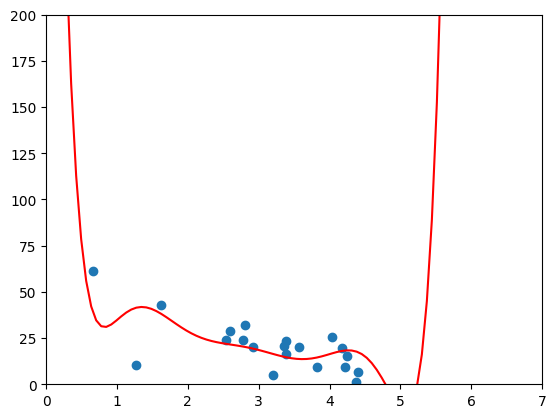

In [78]:
testx = np.array(testX)
testy = np.array(testY)

#plotando o polinômio no gráfico do grupo de teste
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0,200])
plt.scatter(testx, testy)
plt.plot(xp, p4(xp), c='r')
plt.show()

In [79]:
from sklearn.metrics import r2_score

#medindo o desempenho no grupo de teste
r2 = r2_score(testy, p4(testx))

print(r2)

0.30018168611498663


In [80]:
r2 = r2_score(y, p4(x))

#medindo o desempenho no grupo de treino
print(r2)

0.6427069514691666


# Naive Bayes

In [81]:
import pandas as pd
import os
import io 
import numpy
from pandas import DataFrame
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

#lê os arquivos do diretório dado
def readFiles(path):
    for root, dirnames, filenames in os.walk(path):
        for filename in filenames:
            path = os.path.join(root, filename)
            
            inBody = False
            lines = []
            f = io.open(path, 'r', encoding='latin1')
            for line in f:
                if inBody:
                    lines.append(line)
                elif line == '\n':
                    inBody = True
            f.close()
            message = '\n'.join(lines)
            yield path, message #retorna o caminho até o arquivo e o texto

#cria um dataframe com os arquivos de um dado diretório                   
def dataFrameFromDirectory(path, classification):
    rows = []
    index = [] 
    for filename, message in readFiles(path):
        rows.append({'message': message, 'class': classification})
        index.append(filename)
        
    return DataFrame(rows, index=index)

#cria um dataframe que contém as colunas mensagem e classe
data = DataFrame({'message': [], 'class': []})

data = pd.concat([data, dataFrameFromDirectory('emails/spam', 'spam')])
data = pd.concat([data, dataFrameFromDirectory('emails/ham', 'ham')])

In [82]:
data.head()

,message,class
emails/spam/00049.09e42d433e0661f264a25c7d4ed6e3ea,"Me and my friends have this brand new idea, a ...",spam
emails/spam/00403.46d0face754b6bb7dce8b3ea560f75fb,------=_NextPart_000_002B_83A1E322.4D8B344B\n\...,spam
emails/spam/00197.5a921df53d215a60d557c68754559e93,THE ULTIMATE WAY TO WORK FROM HOME \n\nTHE BES...,spam
emails/spam/00220.cf7d03e161582887dc589229e2896e26,ATTN:\n\n\n\nI am Bulawa Mulete JR. the son of...,spam
emails/spam/00488.29e96da757cc5566c848833e26abdd65,"<HTML>\n\n<BODY>\n\n <tr valign=3D""top""> \n\n...",spam


In [83]:
vectorizer = CountVectorizer()
counts = vectorizer.fit_transform(data['message'].values)

#aplicando o Naive Bayes
classifier = MultinomialNB()
targets = data['class'].values
classifier.fit(counts, targets)

MultinomialNB()

In [84]:
#exemplo
examples = ['Free Viagra now!!!', 'Hi Bob, how about a game of golf tomorrow?']
examples_counts = vectorizer.transform(examples)
predictions = classifier.predict(examples_counts)
predictions

array(['spam', 'ham'], dtype='<U4')

# K-Means Clustering

In [85]:
from numpy import random

#a função cria clusters falsos de renda e idade para N pessoas em K clusters
def createClusterData(N, k):
    random.seed(10)
    pointsPerCluster = float(N)/k
    X = []
    for i in range(k):
        #criando centroides aleatorios
        incomeCentroid = random.uniform(20000.0, 200000.0)
        ageCentroid = random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([np.random.normal(incomeCentroid, 10000.0), np.random.normal(ageCentroid, 2.0)])
    X = np.array(X)
    return X

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 0 0 4 4 4]


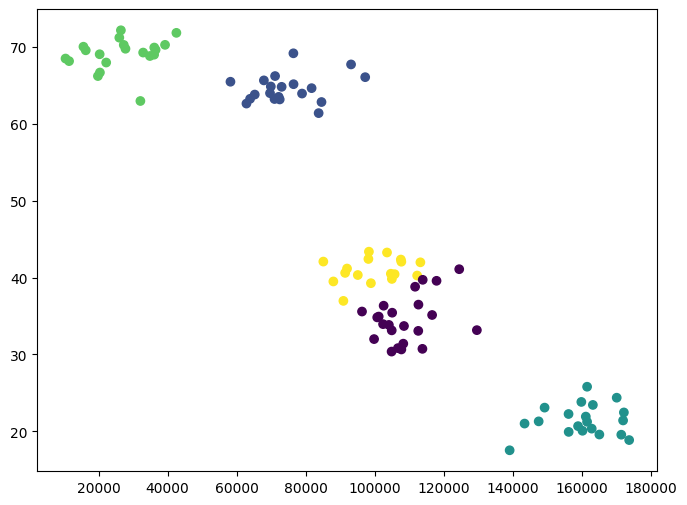

In [94]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import numpy as np 

#criando o conjunto de dados (100 informações em 5 clusters)
data = createClusterData(100, 5) 

#criando o modelo
model = KMeans(n_clusters=5)

#nomralizando os dados
model = model.fit(scale(data))

print(model.labels_)

#plotando o gráfico 
plt.figure(figsize=(8, 6))
plt.scatter(data[:,0], data[:,1], c=model.labels_.astype(np.float_))
plt.show()

# Decision Trees

In [1]:
import numpy as np 
import pandas as pd
from sklearn import tree

input_file = 'PastHires.csv'
#criando o df
df = pd.read_csv(input_file, header=0) 

In [2]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [3]:
#atribuindo valores numéricos às variávies que possuem letras

d = {'Y': 1, 'N': 0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
d = {'BS':0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


In [4]:
#salvando as classes
features = list(df.columns[:6]) 
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [10]:
#criando a arvore de decisao
y = df["Hired"]
X = df[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

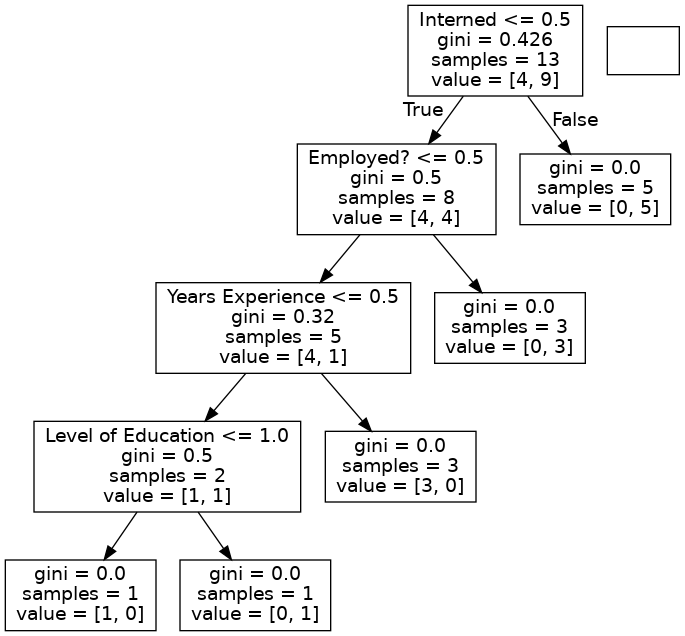

In [14]:
from IPython.display import Image
from six import StringIO
import pydotplus

#mostrando a árvore
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, 
                        feature_names=features)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())